In [1]:
import pandas as pd
import numpy as np
#import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('jaybob.csv',header = 0)
df

,Car ID,Price,Odometer,Age,Pink slip,Sold?
0,1,"$1,000",30.298,28,1,1
1,2,"$9,000",19.647,40,1,0
2,3,$500,170.270,58,0,1
3,4,"$3,000",68.394,12,1,1
4,5,"$9,500",11.662,3,0,0
...,...,...,...,...,...,...
95,96,"$3,000",10.571,33,1,0
96,97,"$4,500",42.990,12,1,1
97,98,"$1,000",4.021,25,0,0
98,99,"$10,000",14.689,3,1,1


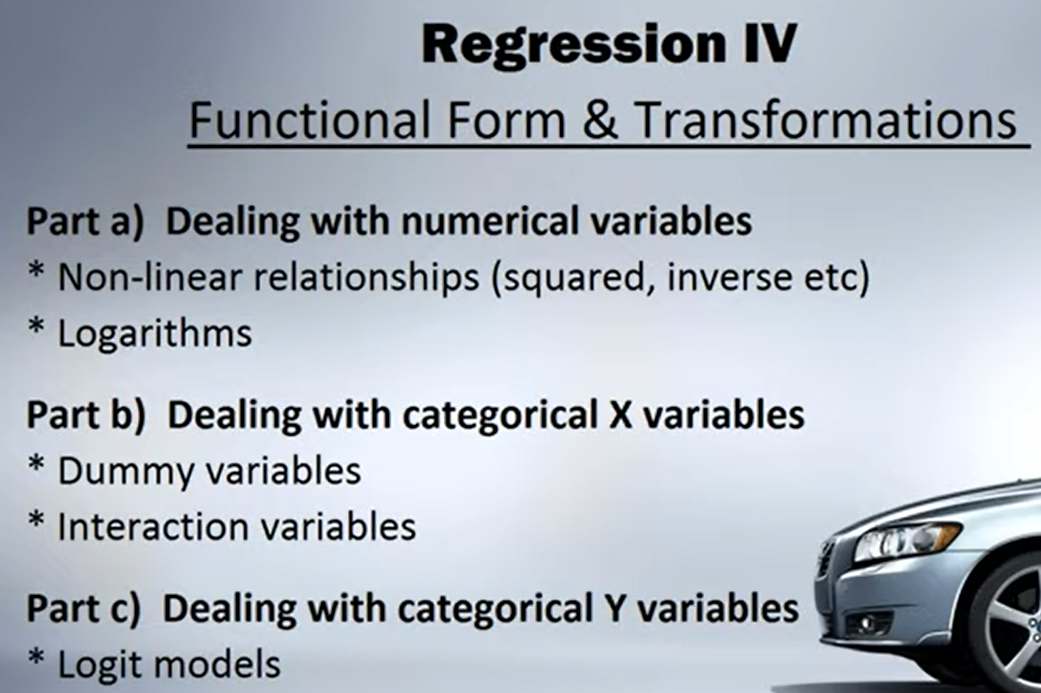

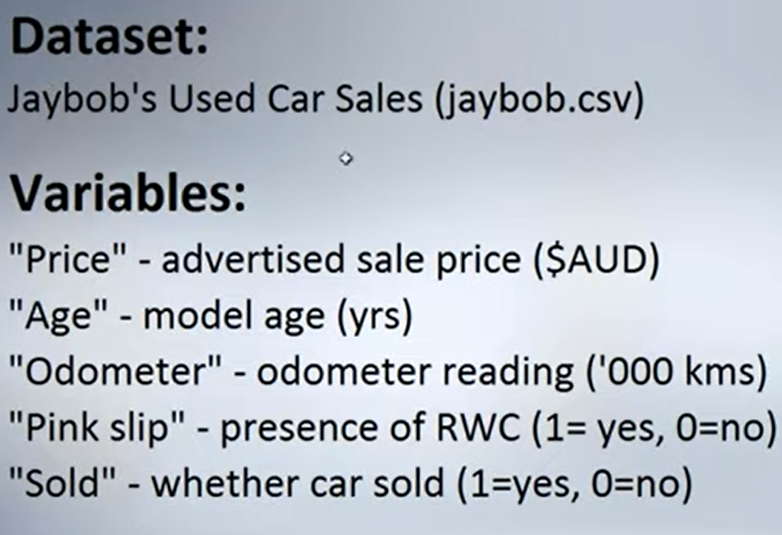

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car ID     100 non-null    int64  
 1    Price     100 non-null    object 
 2   Odometer   100 non-null    float64
 3   Age        100 non-null    int64  
 4   Pink slip  100 non-null    int64  
 5   Sold?      100 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.8+ KB


In [4]:
df.columns

Index(['Car ID', ' Price ', 'Odometer', 'Age', 'Pink slip', 'Sold?'], dtype='object')

In [5]:
Price = []
for i in df[' Price ']:
    elemento = int(i.replace('$','').replace(',','').split()[0])
    Price.append(elemento)

In [6]:
df['Price'] = Price

In [7]:
df.drop(' Price ',axis=1,inplace=True)

### Modelo1  - Age + Odometer


In [8]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price'], dtype='object')

In [9]:
X = df[['Age','Odometer']]
y = df['Price']

In [10]:
#import statsmodels.api as sm
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
model1 = model1.fit()
print_model = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     9.980
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           0.000114
Time:                        22:43:33   Log-Likelihood:                -985.48
No. Observations:                 100   AIC:                             1977.
Df Residuals:                      97   BIC:                             1985.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4615.9004    792.153      5.827      0.0

### Interpretando:       Muito ruim
A cada 1ano o preço sobe em média $98.92, mantendo odometro cte {What???- Deveria ser preço desce}

e a 1000km (odometro) o preço diminui $23.02, mantendo idade cte

Vamos olhar os plots

In [11]:
predictions = model1.predict(X)

MSE = mean_squared_error(y_true = y, y_pred = predictions)

print('MSE_model1:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE_model1:',RMSE)
MAE = mean_absolute_error(y_true = y,y_pred = predictions)
print('MAE_model1:',MAE)

MSE_model1: 21245485.06061165
RMSE_model1: 4609.2824886973085
MAE_model1: 3331.5637778238133


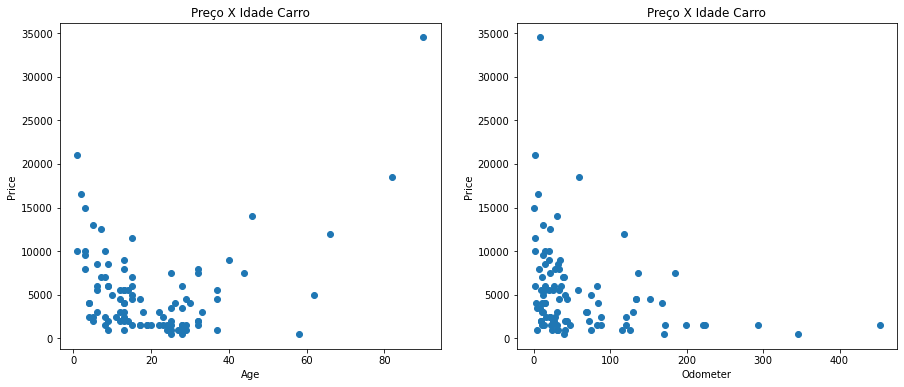

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].scatter(df['Age'],df['Price'])
#plt.scatter(df['Age'], model.fittedvalues,c='k')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Price')
ax[0].set_title('Preço X Idade Carro')


ax[1].scatter(df['Odometer'],df['Price'] )
ax[1].set_xlabel('Odometer')
ax[1].set_ylabel('Price')
ax[1].set_title('Preço X Idade Carro');

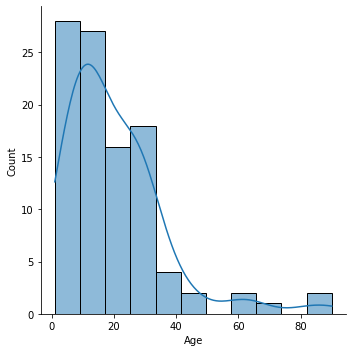

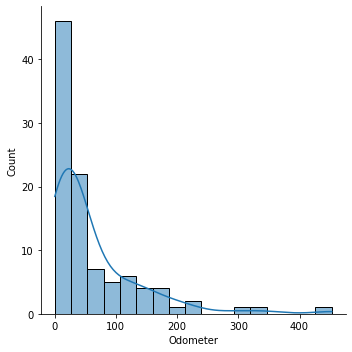

In [13]:
sns.displot(df,x='Age',kde=True),
sns.displot(df,x='Odometer',kde=True);


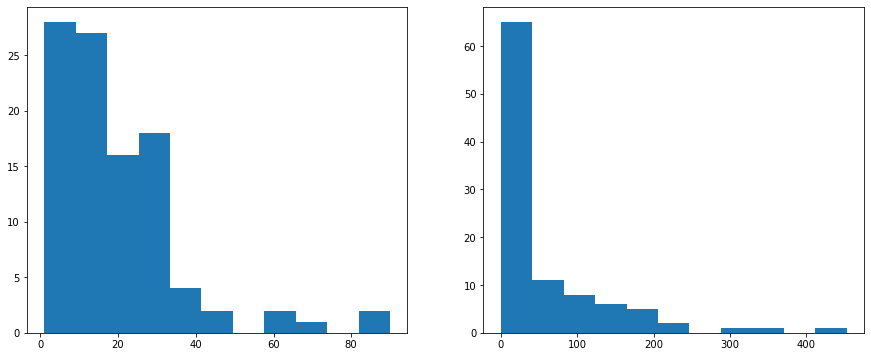

In [14]:
fig,axs = plt.subplots(1,2,figsize=(15, 6))
axs[0].hist(df['Age'], bins=11)
axs[1].hist(df['Odometer'],bins=11);

In [15]:
age2 = []
for i in df['Age']:
    age = i**2
    age2.append(age)
df['Age2'] = age2

In [16]:
age_r = []
for i in df['Age']:
    age = np.sqrt(i)
    age_r.append(age)
    
df['Age_sqrt'] = age_r

In [17]:
odo_ = []
for i in df['Odometer']:
    odo = np.log(i)
    odo_.append(odo)
    
df['Odometer_ln'] = odo_

In [18]:
odo_u = []
for i in df['Odometer']:
    odo = 1/i
    odo_u.append(odo)
    
df['1/Odometer'] = odo_u

In [19]:
df

,Car ID,Odometer,Age,Pink slip,Sold?,Price,Age2,Age_sqrt,Odometer_ln,1/Odometer
0,1,30.298,28,1,1,1000,784,5.291503,3.411082,0.033005
1,2,19.647,40,1,0,9000,1600,6.324555,2.977925,0.050898
2,3,170.270,58,0,1,500,3364,7.615773,5.137385,0.005873
3,4,68.394,12,1,1,3000,144,3.464102,4.225285,0.014621
4,5,11.662,3,0,0,9500,9,1.732051,2.456336,0.085749
...,...,...,...,...,...,...,...,...,...,...
95,96,10.571,33,1,0,3000,1089,5.744563,2.358114,0.094598
96,97,42.990,12,1,1,4500,144,3.464102,3.760968,0.023261
97,98,4.021,25,0,0,1000,625,5.000000,1.391531,0.248694
98,99,14.689,3,1,1,10000,9,1.732051,2.687099,0.068078


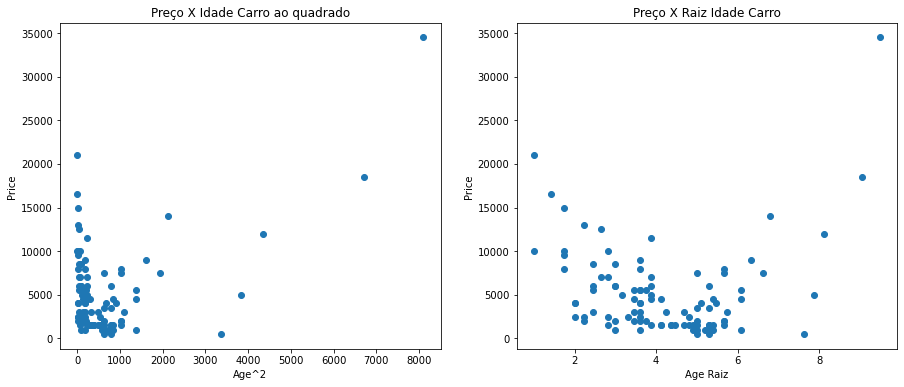

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].scatter(df['Age2'],df['Price'])
#plt.scatter(df['Age'], model.fittedvalues,c='k')
ax[0].set_xlabel('Age^2')
ax[0].set_ylabel('Price')
ax[0].set_title('Preço X Idade Carro ao quadrado')


ax[1].scatter(df['Age_sqrt'],df['Price'] )
ax[1].set_xlabel('Age Raiz')
ax[1].set_ylabel('Price')
ax[1].set_title('Preço X Raiz Idade Carro');

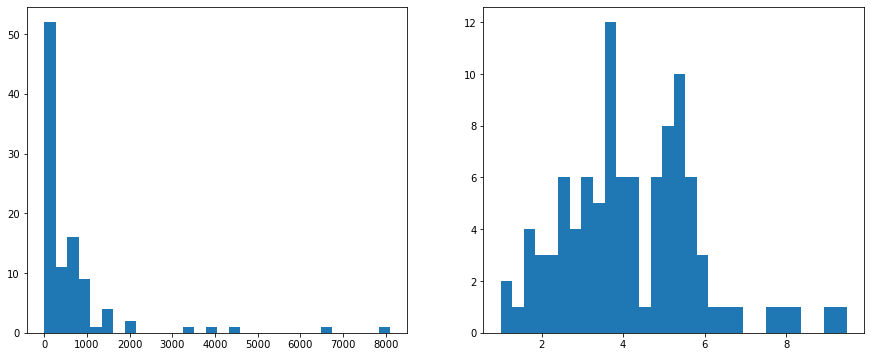

In [21]:
fig,axs = plt.subplots(1,2,figsize=(15, 6))
axs[0].hist(df['Age2'], bins=30)
axs[1].hist(df['Age_sqrt'],bins=30);

# Modelo2
## Age+Age*2+1/odometer

In [22]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price', 'Age2',
       'Age_sqrt', 'Odometer_ln', '1/Odometer'],
      dtype='object')

In [23]:
X = df[['Age','Age2','1/Odometer']]
y = df['Price']

In [24]:
X = sm.add_constant(X)
model2 = sm.OLS(y, X)
model2 = model2.fit()
print_model = model2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     45.13
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           2.78e-18
Time:                        22:43:35   Log-Likelihood:                -950.85
No. Observations:                 100   AIC:                             1910.
Df Residuals:                      96   BIC:                             1920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8809.0342    806.828     10.918      0.0

In [25]:
predictions2 = model2.predict(X)

MSE2 = mean_squared_error(y_true = y, y_pred = predictions2)
print('MSE_model2:',MSE2)
RMSE2 = np.sqrt(MSE2)
print('RMSE_model2:',RMSE2)
MAE2 = mean_absolute_error(y_true = y,y_pred = predictions2)
print('MAE_model2:',MAE2)

MSE_model2: 10628542.635923328
RMSE_model2: 3260.1445728561375
MAE_model2: 2476.021106374253


# Modelo 3 
 
 
 Price = B0 + B1 (Age) + B2(Age)^2 + B3.Ln(Odometer) + resíduo

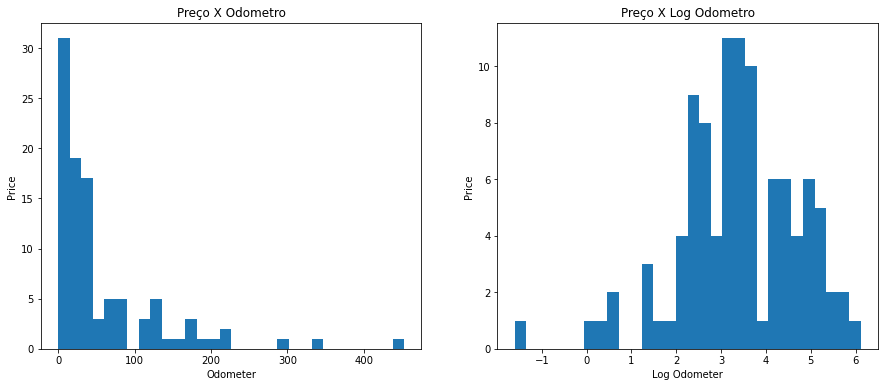

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(df['Odometer'], bins=30)
#plt.scatter(df['Age'], model.fittedvalues,c='k')
ax[0].set_xlabel('Odometer')
ax[0].set_ylabel('Price')
ax[0].set_title('Preço X Odometro')


ax[1].hist(df['Odometer_ln'],bins=30)
ax[1].set_xlabel('Log Odometer')
ax[1].set_ylabel('Price')
ax[1].set_title('Preço X Log Odometro');

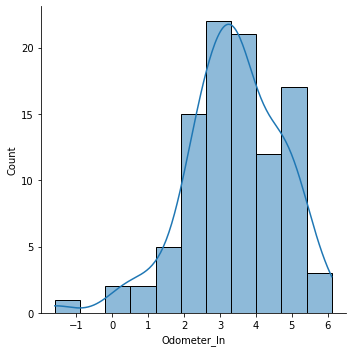

In [27]:
sns.displot(df,x='Odometer_ln',kde=True);

In [28]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price', 'Age2',
       'Age_sqrt', 'Odometer_ln', '1/Odometer'],
      dtype='object')

In [29]:
X = df[['Age','Age2','Odometer_ln']]
y = df['Price']

X = sm.add_constant(X)
model3 = sm.OLS(y, X)
model3 = model3.fit()
print_model = model3.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     50.66
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.02e-19
Time:                        22:43:35   Log-Likelihood:                -947.38
No. Observations:                 100   AIC:                             1903.
Df Residuals:                      96   BIC:                             1913.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.186e+04    940.977     12.607      

In [30]:
predictions3 = model3.predict(X)

MSE3 = mean_squared_error(y_true = y, y_pred = predictions3)
print('MSE_model3:',MSE3)
RMSE3 = np.sqrt(MSE3)
print('RMSE_model3:',RMSE3)
MAE3 = mean_absolute_error(y_true = y,y_pred = predictions3)
print('MAE_model3:',MAE3)

MSE_model3: 9916762.402779091
RMSE_model3: 3149.0891385889813
MAE_model3: 2457.812350874848


# Modelo 4

Ln(Price) = B0+ B1(Age) + B2(Age)^2 + B3.Ln(Odometer) + resíduos

In [31]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price', 'Age2',
       'Age_sqrt', 'Odometer_ln', '1/Odometer'],
      dtype='object')

In [32]:
precos =[]

for i in df['Price']:
    preco = np.log(i)
    precos.append(preco)
    
df['log_Price']=precos

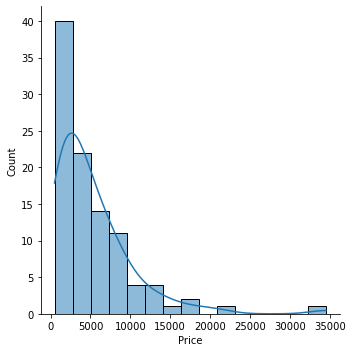

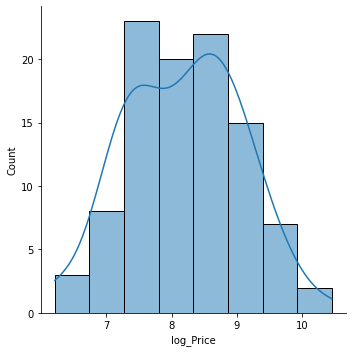

In [33]:
sns.displot(df,x='Price',kde=True)
sns.displot(df,x='log_Price',kde=True);

In [34]:
X = df[['Age','Age2','Odometer_ln']]
y = df['log_Price']

X = sm.add_constant(X)

model4 = sm.OLS(y, X)
model4 = model4.fit()
print_model = model4.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     18.15
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           2.09e-09
Time:                        22:43:36   Log-Likelihood:                -107.19
No. Observations:                 100   AIC:                             222.4
Df Residuals:                      96   BIC:                             232.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.3916      0.211     44.472      

In [35]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error

predictions4 = model4.predict(X)

MSE4 = mean_squared_error(y_true = y, y_pred = predictions4)
print('MSE_modelo4:',MSE4)
RMSE4 = np.sqrt(MSE4)
print('RMSE_model4:',RMSE4)
MAE4 = mean_absolute_error(y_true = y,y_pred = predictions4)
print('MAE_modelo4:',MAE4)

MSE_modelo4: 0.49948623379568136
RMSE_model4: 0.7067434002491154
MAE_modelo4: 0.5837257582026252


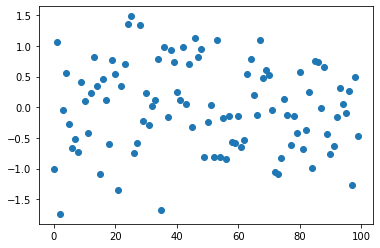

In [61]:
plt.plot(model5.resid, 'o');

# Categorical

## modelo 5
Ln(Price) = bo + b1.Age + b2.Age^2 + b3.Ln(Odometer) + b4.Pink_Slip + resíduos

In [38]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price', 'Age2',
       'Age_sqrt', 'Odometer_ln', '1/Odometer', 'log_Price'],
      dtype='object')

In [39]:
X = df[['Age','Age2','Odometer_ln','Pink slip']]
y = df['log_Price']

X = sm.add_constant(X)

model5 = sm.OLS(y, X)
model5 = model5.fit()
print_model = model5.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     13.77
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           6.82e-09
Time:                        22:43:36   Log-Likelihood:                -106.79
No. Observations:                 100   AIC:                             223.6
Df Residuals:                      95   BIC:                             236.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.2371      0.276     33.512      

In [40]:
predictions5 = model5.predict(X)

MSE5 = mean_squared_error(y_true = y, y_pred = predictions5)
print('MSE_modelo5:',MSE5)
RMSE5 = np.sqrt(MSE5)
print('RMSE_model5:',RMSE5)
MAE5 = mean_absolute_error(y_true = y,y_pred = predictions5)
print('MAE_modelo5:',MAE5)

MSE_modelo5: 0.49550682368343985
RMSE_model5: 0.7039224557317658
MAE_modelo5: 0.5829228969153271


# Multi-level categorical

Vamos separar a coluna idade em partes:
Age_car 
* = 1 if age<= 5 
* = 2 if 5< age<= 15
* = 3 if 15< age <= 35
* = 4 if age > 35  --> (Vintage)

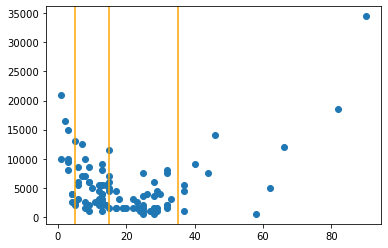

In [41]:
plt.scatter(df.Age,df.Price)
plt.axvline(x=5,ymin=0,ymax=35000, color='orange')
plt.axvline(x=15,ymin=0,ymax=35000, color='orange')
plt.axvline(x=35,ymin=0,ymax=35000, color='orange')

In [42]:
k = [0,5,15,35,df.Age.max()]
labels = [1,2,3,4]
df['Age_mult'] = pd.cut(x = df['Age'],bins = k,labels=labels,include_lowest=True)

In [43]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price', 'Age2',
       'Age_sqrt', 'Odometer_ln', '1/Odometer', 'log_Price', 'Age_mult'],
      dtype='object')

In [44]:
X_mult = df[['Age_mult','Odometer_ln','Pink slip']]
y_mult = df['log_Price']

X_mult = sm.add_constant(X_mult)

model_mult = sm.OLS(y_mult, X_mult)
model_mult = model_mult.fit()
print_model = model_mult.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     7.903
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           9.14e-05
Time:                        22:43:36   Log-Likelihood:                -118.61
No. Observations:                 100   AIC:                             245.2
Df Residuals:                      96   BIC:                             255.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.9751      0.340     26.390      

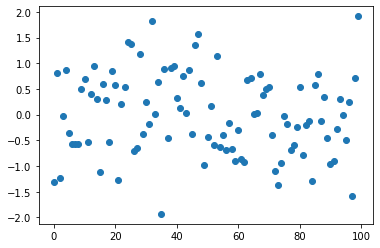

In [45]:
plt.plot(model_mult.resid, 'o');

In [46]:
Age_dummie = pd.get_dummies(df['Age_mult'], prefix = 'AgeCat')
Age_dummie.drop(Age_dummie.columns[0],axis = 1, inplace=True)

In [47]:
df = pd.concat([df,Age_dummie],axis=1)
df.head()

,Car ID,Odometer,Age,Pink slip,Sold?,Price,Age2,Age_sqrt,Odometer_ln,1/Odometer,log_Price,Age_mult,AgeCat_2,AgeCat_3,AgeCat_4
0,1,30.298,28,1,1,1000,784,5.291503,3.411082,0.033005,6.907755,3,0,1,0
1,2,19.647,40,1,0,9000,1600,6.324555,2.977925,0.050898,9.104980,4,0,0,1
2,3,170.270,58,0,1,500,3364,7.615773,5.137385,0.005873,6.214608,4,0,0,1
3,4,68.394,12,1,1,3000,144,3.464102,4.225285,0.014621,8.006368,2,1,0,0
4,5,11.662,3,0,0,9500,9,1.732051,2.456336,0.085749,9.159047,1,0,0,0


# Modelo 6

Ln(Price) = b0 + b1.(AgeCat2) + b2.(AgeCat3) + b3.(AgeCat4) + b4.Ln(Odometer)+ b5.(PinkSlip) + resíduos

In [48]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price', 'Age2',
       'Age_sqrt', 'Odometer_ln', '1/Odometer', 'log_Price', 'Age_mult',
       'AgeCat_2', 'AgeCat_3', 'AgeCat_4'],
      dtype='object')

In [49]:
X = df[['AgeCat_2','AgeCat_3','AgeCat_4','Odometer_ln','Pink slip']]
y = df['log_Price']

X = sm.add_constant(X)

model6 = sm.OLS(y, X)
model6 = model6.fit()
print_model = model6.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     12.12
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           4.56e-09
Time:                        22:43:37   Log-Likelihood:                -104.77
No. Observations:                 100   AIC:                             221.5
Df Residuals:                      94   BIC:                             237.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.9484      0.279     32.038      

In [50]:
predictions6 = model6.predict(X)

MSE6 = mean_squared_error(y_true = y, y_pred = predictions6)
print('MSE_modelo6:',MSE6)
RMSE6 = np.sqrt(MSE6)
print('RMSE_model6:',RMSE6)
MAE6 = mean_absolute_error(y_true = y,y_pred = predictions6)
print('MAE_modelo6:',MAE6)

MSE_modelo6: 0.4759652149718464
RMSE_model6: 0.6899023227760915
MAE_modelo6: 0.5429976885413259


# Modelo 7
### Categorical X variables | Interaction terms

Ln(Price) = b0+b1(AgeCat2)+b2(AgeCat3)+b3(AgeCat4)+b4.Ln(Odometer)+b5.(PinkSlip)+
b6(PinkSlip)X(AgeCat4)


In [51]:
df['inter'] = list(map(lambda x , y: x*y, df['Pink slip'],df['AgeCat_4']))

In [52]:
pd.set_option('display.max_rows',100)
df[['Pink slip','AgeCat_4','inter']]

,Pink slip,AgeCat_4,inter
0,1,0,0
1,1,1,1
2,0,1,0
3,1,0,0
4,0,0,0
5,0,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [53]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price', 'Age2',
       'Age_sqrt', 'Odometer_ln', '1/Odometer', 'log_Price', 'Age_mult',
       'AgeCat_2', 'AgeCat_3', 'AgeCat_4', 'inter'],
      dtype='object')

In [54]:
X = df[['AgeCat_2','AgeCat_3','AgeCat_4','Odometer_ln','Pink slip','inter']]
y = df['log_Price']

X = sm.add_constant(X)

model7 = sm.OLS(y, X)
model7 = model7.fit()
print_model = model7.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     12.50
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           2.77e-10
Time:                        22:43:37   Log-Likelihood:                -100.08
No. Observations:                 100   AIC:                             214.2
Df Residuals:                      93   BIC:                             232.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.1252      0.274     33.275      

Para modelos igual ou com menos do que 35anos com o certificado PinkSlip aumenta o preço na média de 12,3%, mantendo as outras variáveis constantes.
No entanto, com mais de 35 anos e com certificado PinkSlip o aumento é de 137,1% na média e outras variáveis constantes

In [55]:
X.shape,y.shape

((100, 7), (100,))

In [56]:
predictions7 = model7.predict(X)

MSE7 = mean_squared_error(y_true = y, y_pred = predictions7)
print('MSE_modelo7:',MSE7)
RMSE7 = np.sqrt(MSE7)
print('RMSE_model7:',RMSE7)
MAE7 = mean_absolute_error(y_true = y,y_pred = predictions7)
print('MAE_modelo7:',MAE7)

MSE_modelo7: 0.4333311636631128
RMSE_model7: 0.658278940619486
MAE_modelo7: 0.5336522452527419


### Exercicio:
Using model7, find the expected sale price of my 1974 Datsun 120Y Coupe with 290,000Km on the odometer and a road worthy certificate.

Considerando ano 2021: Age = 47

In [57]:
np.log(290) # Lembrando que no modelo7 é o log de odometro

5.66988092298052

In [58]:
X_exer = [[1,0,0,1,5.66988092298052,1,1]]

predictions_ex = model7.predict(X_exer)
predictions_ex # resultado está em Logaritmo, então tem que colocar em exponencial

array([9.04101469])

In [59]:
np.exp(9.04101469) # Um valor provável pra o carro é de $8,442.34

8442.339068406161

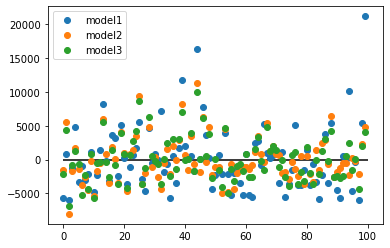

In [73]:
fig, ax =plt.subplots()
ax.plot(model1.resid, 'o',label='model1')
ax.plot(model2.resid, 'o',label = 'model2')
ax.plot(model3.resid, 'o',label='model3')
ax.hlines(0,0,100,'k')
ax.legend();

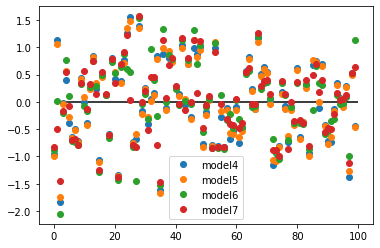

In [74]:
fig, ax =plt.subplots()
ax.plot(model4.resid, 'o',label='model4')
ax.plot(model5.resid, 'o',label='model5')
ax.plot(model6.resid, 'o',label='model6')
ax.plot(model7.resid, 'o',label='model7')
ax.hlines(0,0,100,'k')
ax.legend();

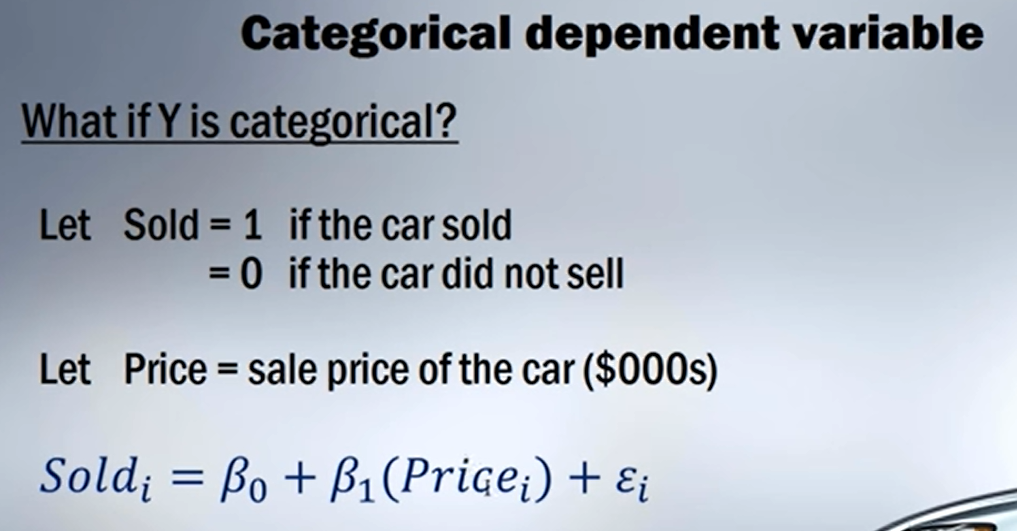

In [77]:
df.columns

Index(['Car ID', 'Odometer', 'Age', 'Pink slip', 'Sold?', 'Price', 'Age2',
       'Age_sqrt', 'Odometer_ln', '1/Odometer', 'log_Price', 'Age_mult',
       'AgeCat_2', 'AgeCat_3', 'AgeCat_4', 'inter'],
      dtype='object')

In [ ]:
# Enable interactive plot
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

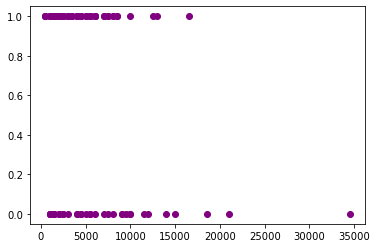

In [106]:

plt.scatter(df['Price'],df['Sold?'],color='purple',marker='o');
fig.set_label('Sold?');

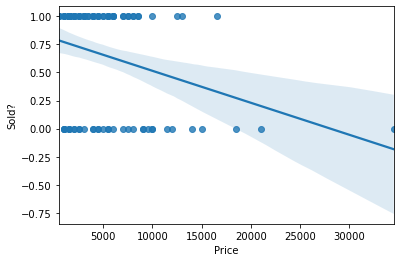

In [89]:
ax = sns.regplot(x='Price', y='Sold?', data=df,fit_reg=True )#,logistic=True n_boot=1500

A regressão está estimando uma probabilidade de o carro ser sold. Mas não pode ser negativo.

 Pi = bo + b1(Price)+ resíduo . Não poderemos usar OLS.
 Prob(sold) range[0,1] 
 Midpoint= 0.5
 
 Pi/(1-Pi) = b0 + b1(Price)+ resíduo
 (odds) - Range [0,infinito]
 Midpoint 1 . muito skewed
 0.5/0.5 = 1 ou 1 to 1
 
 ex. se Pi = 0.8 e (1-Pi)=0.2  odds 4 to 1
 
 Pi- do carro vender (1-Pi)- prob de carro não vender
 
 Pra ser simétrico :
 Ln(Pi/(1-Pi)) = b0 + b1(Price)+ resíduo
 (odds) - Range [-infinito , infinito]
 Midpoint 0 . simétrico
 

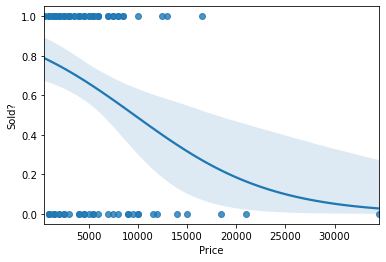

In [109]:
ax = sns.regplot(x='Price', y='Sold?', data=df,fit_reg=True, logistic=True, n_boot=15000 )#